Annual cycle of number of CB (n_cb_per_year), and of area of CB


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.patheffects as mpe
from matplotlib.ticker import MultipleLocator
import os, sys
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

from cloudbandpy.figure_tools import set_fontsize
from cloudbandpy.io_utilities import load_ymlfile, load_data_from_saved_var_files
from cloudbandpy.misc import parse_arguments
from cloudbandpy.time_utilities import add_startend_datetime2config, create_list_of_dates

In [2]:
def set_figures_props():
    set_fontsize(size=18)
    mpl.rcParams["axes.spines.left"] = True
    mpl.rcParams["axes.spines.right"] = False
    mpl.rcParams["axes.spines.top"] = False
    mpl.rcParams["axes.spines.bottom"] = True
    return


def get_cmap(n, name="viridis"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return mpl.cm.get_cmap(name, n)


Configuration file

In [3]:
base_dir = "../../"

config_file = os.path.join(base_dir, "config/config_cbworkflow_southPacific.yml")
config = load_ymlfile(config_file, isconfigfile=True)

# Make sure the dates are covering the whole period
config_copy = config.copy()
config_copy["startdate"] = "19590101.00"
config_copy["enddate"] = "20211231.00"
config_copy["load_saved_files"] = True

add_startend_datetime2config(config_copy)
list_of_dates = create_list_of_dates(config_copy)

2023-12-13 16:52:57,992 - io_utilities.load_ymlfile - INFO: Configuration file loaded


Load cloud bands for the each basin

In [4]:
config_copy["domain"] = "southPacific"
list_of_cloud_bands_southPacific = load_data_from_saved_var_files(config_copy, varname="list_of_cloud_bands")

config_copy["domain"] = "northPacific"
list_of_cloud_bands_northPacific = load_data_from_saved_var_files(config_copy, varname="list_of_cloud_bands")

config_copy["domain"] = "southAtlantic"
list_of_cloud_bands_southAtlantic = load_data_from_saved_var_files(config_copy, varname="list_of_cloud_bands")

config_copy["domain"] = "southIndianOcean"
list_of_cloud_bands_southIndianOcean = load_data_from_saved_var_files(config_copy, varname="list_of_cloud_bands")

2023-12-13 16:52:58,001 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:53:14,815 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:53:23,294 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:53:28,546 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00


In [5]:
def list_of_cb_area_per_day(inlist: list):
    list_area_per_day = []
    for sublist in inlist:
        if not sublist:  # Check if sublist is empty
            list_area_per_day.append([0])
        else:
            areas = [cb.area if hasattr(cb, 'area') else 0 for cb in sublist]
            list_area_per_day.append([areas])
    return list_area_per_day

def list_of_sum_cb_area_per_day(inlist: list):
    list_area_per_day = []
    for sublist in inlist:
        if not sublist:  # Check if sublist is empty
            list_area_per_day.append(0)
        else:
            areas = [cb.area if hasattr(cb, 'area') else 0 for cb in sublist]
            list_area_per_day.append(sum(areas))
    return list_area_per_day

In [6]:
list_of_cb_area_per_day_southPacific = list_of_cb_area_per_day(list_of_cloud_bands_southPacific)
list_of_cb_area_per_day_northPacific = list_of_cb_area_per_day(list_of_cloud_bands_northPacific)
list_of_cb_area_per_day_southAtlantic = list_of_cb_area_per_day(list_of_cloud_bands_southAtlantic)
list_of_cb_area_per_day_southIndianOcean = list_of_cb_area_per_day(list_of_cloud_bands_southIndianOcean)

list_of_sum_cb_area_per_day_southPacific = list_of_sum_cb_area_per_day(list_of_cloud_bands_southPacific)
list_of_sum_cb_area_per_day_northPacific = list_of_sum_cb_area_per_day(list_of_cloud_bands_northPacific)
list_of_sum_cb_area_per_day_southAtlantic = list_of_sum_cb_area_per_day(list_of_cloud_bands_southAtlantic)
list_of_sum_cb_area_per_day_southIndianOcean = list_of_sum_cb_area_per_day(list_of_cloud_bands_southIndianOcean)

In [7]:
len(list_of_sum_cb_area_per_day_southPacific)

23011

In [8]:
series_southPacific = pd.Series(list_of_sum_cb_area_per_day_southPacific, name="sum_cb_area_southPacific", index=list_of_dates)
series_northPacific = pd.Series(list_of_sum_cb_area_per_day_northPacific, name="sum_cb_area_northPacific", index=list_of_dates)
series_southAtlantic = pd.Series(list_of_sum_cb_area_per_day_southAtlantic, name="sum_cb_area_southAtlantic", index=list_of_dates)
series_southIndianOcean = pd.Series(list_of_sum_cb_area_per_day_southIndianOcean, name="sum_cb_area_southIndianOcean", index=list_of_dates)

In [9]:
domain_cloud_bands = {
    "South Pacific": list_of_cloud_bands_southPacific,
    "North Pacific": list_of_cloud_bands_northPacific,
    "South Atlantic": list_of_cloud_bands_southAtlantic,
    "South Indian Ocean": list_of_cloud_bands_southIndianOcean,
}

In [10]:
df_list = []

for domain, cloud_bands in domain_cloud_bands.items():
    # Number of cloud bands for each day
    nb_cb_each_date = [len(el) for el in cloud_bands]

    # Create a list for pandas dataframe
    list4pandas = [
        [date, nb_cb]
        for date, nb_cb in zip(list_of_dates, nb_cb_each_date)
    ]

    # Create a dataframe for each domain
    df_domain = pd.DataFrame(list4pandas, columns=["time", domain])
    df_list.append(df_domain)

In [11]:
# Merge dataframes based on the 'time' column
df = df_list[0]
for df_domain in df_list[1:]:
    df = pd.merge(df, df_domain, on="time", how="outer")

# Set 'time' as the index
df.set_index("time", inplace=True)

# Add 'year' and 'month' columns
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day

In [12]:
df

,South Pacific,North Pacific,South Atlantic,South Indian Ocean,year,month,day
time,,,,,,,
1959-01-01,0,0,1,1,1959,1,1
1959-01-02,3,1,0,0,1959,1,2
1959-01-03,1,0,0,0,1959,1,3
1959-01-04,1,2,1,0,1959,1,4
1959-01-05,1,1,1,1,1959,1,5
...,...,...,...,...,...,...,...
2021-12-27,2,0,1,0,2021,12,27
2021-12-28,2,0,1,0,2021,12,28
2021-12-29,1,1,1,1,2021,12,29


Compute numbers of cloud bands per year

In [13]:
# Group by 'year'
yearlysum = df.groupby("year")[["South Pacific", "North Pacific", "South Atlantic", "South Indian Ocean"]].sum()
yearlysum.index = pd.to_datetime(yearlysum.index, format="%Y")

In [14]:
yearlysum

,South Pacific,North Pacific,South Atlantic,South Indian Ocean
year,,,,
1959-01-01,245,182,97,70
1960-01-01,260,143,124,64
1961-01-01,234,154,84,68
1962-01-01,268,148,126,67
1963-01-01,252,121,105,63
...,...,...,...,...
2017-01-01,227,135,104,49
2018-01-01,240,183,107,64
2019-01-01,237,162,77,81


Plot number of cloud bands per year

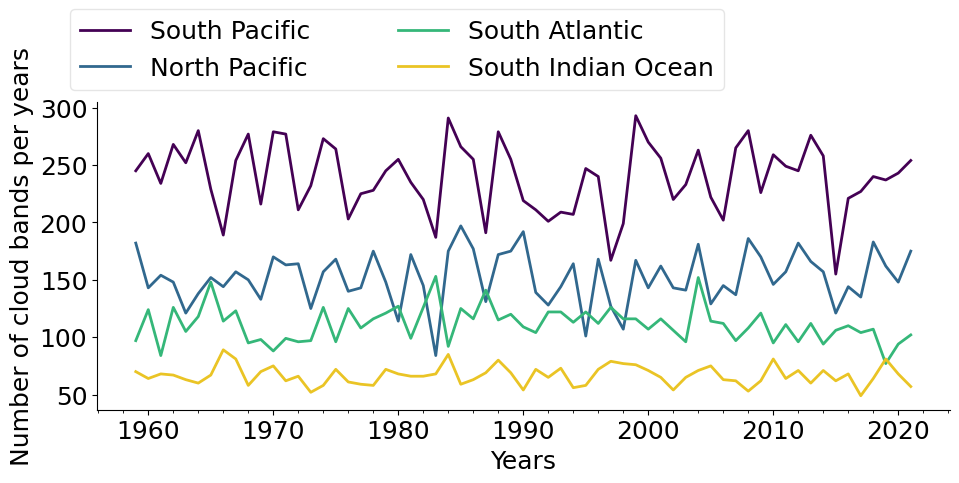

In [15]:
set_figures_props()
# mean number of cloud band per month on the whole ERA5 period
cmap = get_cmap(len(yearlysum.keys()))
fig, ax = plt.subplots(1, 1, figsize=(11, 4))

for i,basin in enumerate(yearlysum.keys()):
    if basin=="South Indian Ocean":
        ax.plot(yearlysum.index, yearlysum[basin], lw=2, c="#eac425", label=basin)
    else:
        ax.plot(yearlysum.index, yearlysum[basin], lw=2, c=cmap(i), label=basin)

ax.set_xticklabels(yearlysum.index)
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlabel("Years")
ax.set_ylabel("Number of cloud bands per years")
plt.legend(
    bbox_to_anchor=(0, 1.1, .735, 0.2), borderaxespad=0, ncol=2, columnspacing=3.5, framealpha=0.5
)

In [18]:
newdf = pd.DataFrame(index=series_southPacific.index)

newdf['South Pacific'] = series_southPacific.values
newdf['North Pacific'] = series_northPacific.values
newdf['South Atlantic'] = series_southAtlantic.values
newdf['South Indian Ocean'] = series_southIndianOcean.values

# Add 'year' and 'month' columns
newdf["year"] = df.index.year
newdf["month"] = df.index.month
newdf["day"] = df.index.day

In [19]:
# Group by 'year'
yearlycb_area_mean = newdf.groupby("year")[["South Pacific", "North Pacific", "South Atlantic", "South Indian Ocean"]].mean()
yearlycb_area_mean.index = pd.to_datetime(yearlycb_area_mean.index, format="%Y")

In [20]:
yearlycb_area_mean

,South Pacific,North Pacific,South Atlantic,South Indian Ocean
year,,,,
1959-01-01,3.622456e+06,1.561088e+06,8.487926e+05,531627.938859
1960-01-01,3.434364e+06,1.386562e+06,1.180127e+06,527947.445184
1961-01-01,3.332040e+06,1.378407e+06,7.475593e+05,539380.775945
1962-01-01,3.524546e+06,1.456463e+06,1.191789e+06,549417.654753
1963-01-01,2.999659e+06,1.182870e+06,9.290821e+05,503974.368436
...,...,...,...,...
2017-01-01,3.531380e+06,1.705981e+06,1.010396e+06,451180.398569
2018-01-01,3.768288e+06,2.104674e+06,9.714872e+05,516297.479908
2019-01-01,3.460653e+06,1.698824e+06,6.618974e+05,792386.924686


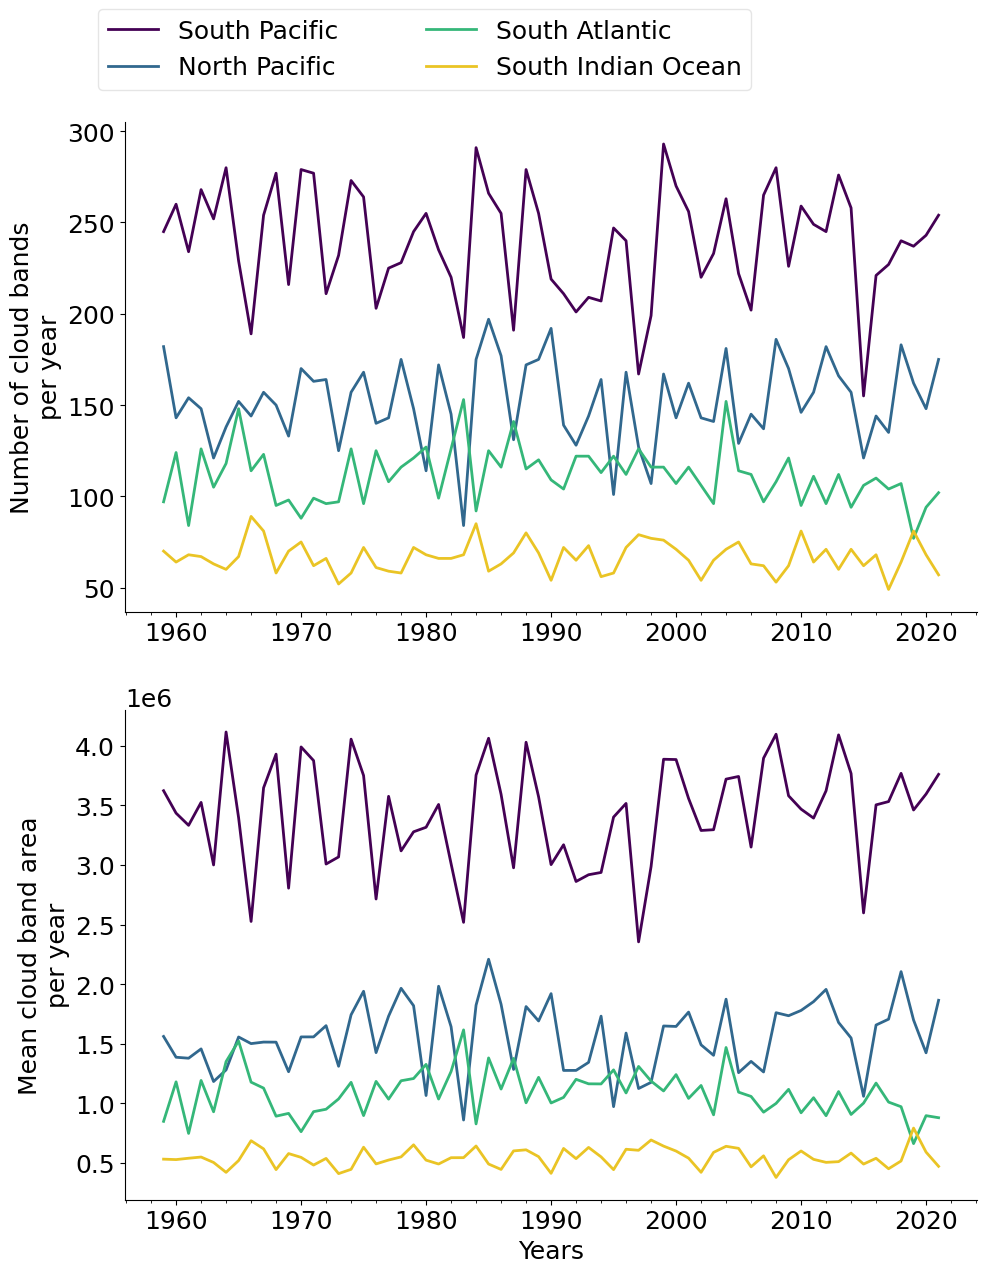

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(11, 14))

cmap = get_cmap(len(yearlysum.keys()))

for iax, ax in enumerate(axes.ravel()):
    if iax==0:
        for i, basin in enumerate(yearlysum.keys()):
            if basin=="South Indian Ocean":
                ax.plot(yearlysum.index, yearlysum[basin], lw=2, c="#eac425", label=basin)
            else:
                ax.plot(yearlysum.index, yearlysum[basin], lw=2, c=cmap(i), label=basin)
        ax.set_ylabel("Number of cloud bands\nper year")
        ax.set_xticklabels(yearlycb_area_mean.index)
        ax.xaxis.set_major_locator(mdates.YearLocator(10))
        ax.xaxis.set_minor_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    else:
        for i, name in enumerate(yearlycb_area_mean.keys()):  # no index
            if name=="South Indian Ocean":
                ax.plot(yearlycb_area_mean.index, yearlycb_area_mean[name], lw=2, c="#eac425", label=name)
            else:
                ax.plot(yearlycb_area_mean.index, yearlycb_area_mean[name], lw=2, c=cmap(i), label=name)
        ax.set_ylabel("Mean cloud band area\nper year")
        ax.set_xticklabels(yearlycb_area_mean.index)
        ax.xaxis.set_major_locator(mdates.YearLocator(10))
        ax.xaxis.set_minor_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
        ax.set_xlabel("Years")

plt.legend(
    bbox_to_anchor=(0, 2.23, .735, 0.2), borderaxespad=0, ncol=2, columnspacing=3.5, framealpha=0.5
)
# fig.savefig("./timeseries_2panels.png", dpi=200, bbox_inches="tight")